In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [23]:
# Read in csv file

csv1 = "1900_thru_1950.csv"
csv2 = "1951_thru_2021.csv"

data1 = pd.read_csv(csv1)
data2 = pd.read_csv(csv2)

In [24]:
# Create dataframes of raw precipitation data

data1_df = pd.DataFrame(data1)

data1_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-01,2.50,"1,,,0"
1,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-02,3.16,",,,0"
2,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-03,3.23,",,,0"
3,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-04,4.11,",,,0"
4,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-05,4.75,",,,0"
...,...,...,...,...,...,...,...,...
30264,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1919-11,3.04,",,,6"
30265,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1919-12,1.65,",,,6"
30266,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1920-01,NaN,NaN
30267,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1920-02,4.80,",,,6"


In [25]:
data2_df = pd.DataFrame(data2)

data2_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-04,6.43,",,,N"
1,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-05,2.54,",,,N"
2,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-06,4.99,",a,,N"
3,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-07,7.11,",,,N"
4,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-08,6.04,",,,N"
...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2020-11,6.64,"2,,,N"
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2020-12,5.57,"1,,,N"
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2021-01,3.96,"3,,,N"
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2021-02,10.81,",,,N"


In [27]:
# Merge dataframes on "Station" column

raw_prec_df = pd.concat([data1_df,data2_df])

raw_prec_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-01,2.50,"1,,,0"
1,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-02,3.16,",,,0"
2,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-03,3.23,",,,0"
3,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-04,4.11,",,,0"
4,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-05,4.75,",,,0"
...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N"
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N"
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N"
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-02,10.81,",,,N"


In [45]:
# Split month and year in "DATE" column

year_and_month_df = raw_prec_df["DATE"].str.split(pat="-", expand=True)

year_and_month_df

,0,1
0,1949,01
1,1949,02
2,1949,03
3,1949,04
4,1949,05
...,...,...
109488,2020,11
109489,2020,12
109490,2021,01
109491,2021,02


In [51]:
# Rename columns as "YEAR" and "MONTH"

year_and_month_df = year_and_month_df.rename(columns= {0: "YEAR", 1: "MONTH"})

In [54]:
# Add "YEAR" column to raw_prec_df

raw_prec_df["YEAR"] = year_and_month_df["YEAR"]

raw_prec_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,YEAR
0,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-01,2.50,"1,,,0",1949
1,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-02,3.16,",,,0",1949
2,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-03,3.23,",,,0",1949
3,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-04,4.11,",,,0",1949
4,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-05,4.75,",,,0",1949
...,...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N",2020
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N",2020
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N",2021
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-02,10.81,",,,N",2021


In [61]:
# Group data by year

print(raw_prec_df["YEAR"].unique())

prec_groupby_year = raw_prec_df.groupby("YEAR")

['1949' '1950' '1914' '1915' '1916' '1917' '1918' '1919' '1920' '1921'
 '1922' '1923' '1924' '1925' '1926' '1927' '1928' '1929' '1930' '1931'
 '1932' '1933' '1934' '1935' '1936' '1937' '1938' '1939' '1940' '1941'
 '1942' '1943' '1944' '1945' '1900' '1901' '1902' '1903' '1904' '1909'
 '1910' '1911' '1912' '1913' '1946' '1947' '1948' '1905' '1906' '1907'
 '1908' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2008'
 '2009' '2010' '2011' '2012' '2013' '1951' '1952' '1953' '1954' '1955'
 '1956' '1957' '1958' '1959' '1960' '1961' '1962' '2007' '1963' '1964'
 '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974'
 '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984'
 '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006']


In [63]:
# Use sum method to calculate total measured precipitation by year

total_annual_prec = prec_groupby_year["PRCP"].sum()

total_annual_prec

YEAR
1900      931.32
1901     1125.84
1902      839.29
1903     1209.43
1904     1141.03
          ...   
2017    16936.31
2018    23750.74
2019    18407.73
2020    25031.78
2021     5208.72
Name: PRCP, Length: 122, dtype: float64

In [64]:
# Reset index

total_annual_prec = total_annual_prec.reset_index()

In [65]:
# Convert total annual measured precipitation to dataframe

#total_annual_prec_df = pd.DataFrame(total_annual_prec)

#total_annual_prec_df.DATE.replace({"-02": ""}, regex=True)

#total_annual_prec_df

In [66]:
total_annual_prec_df.dtypes

YEAR     object
PRCP    float64
dtype: object

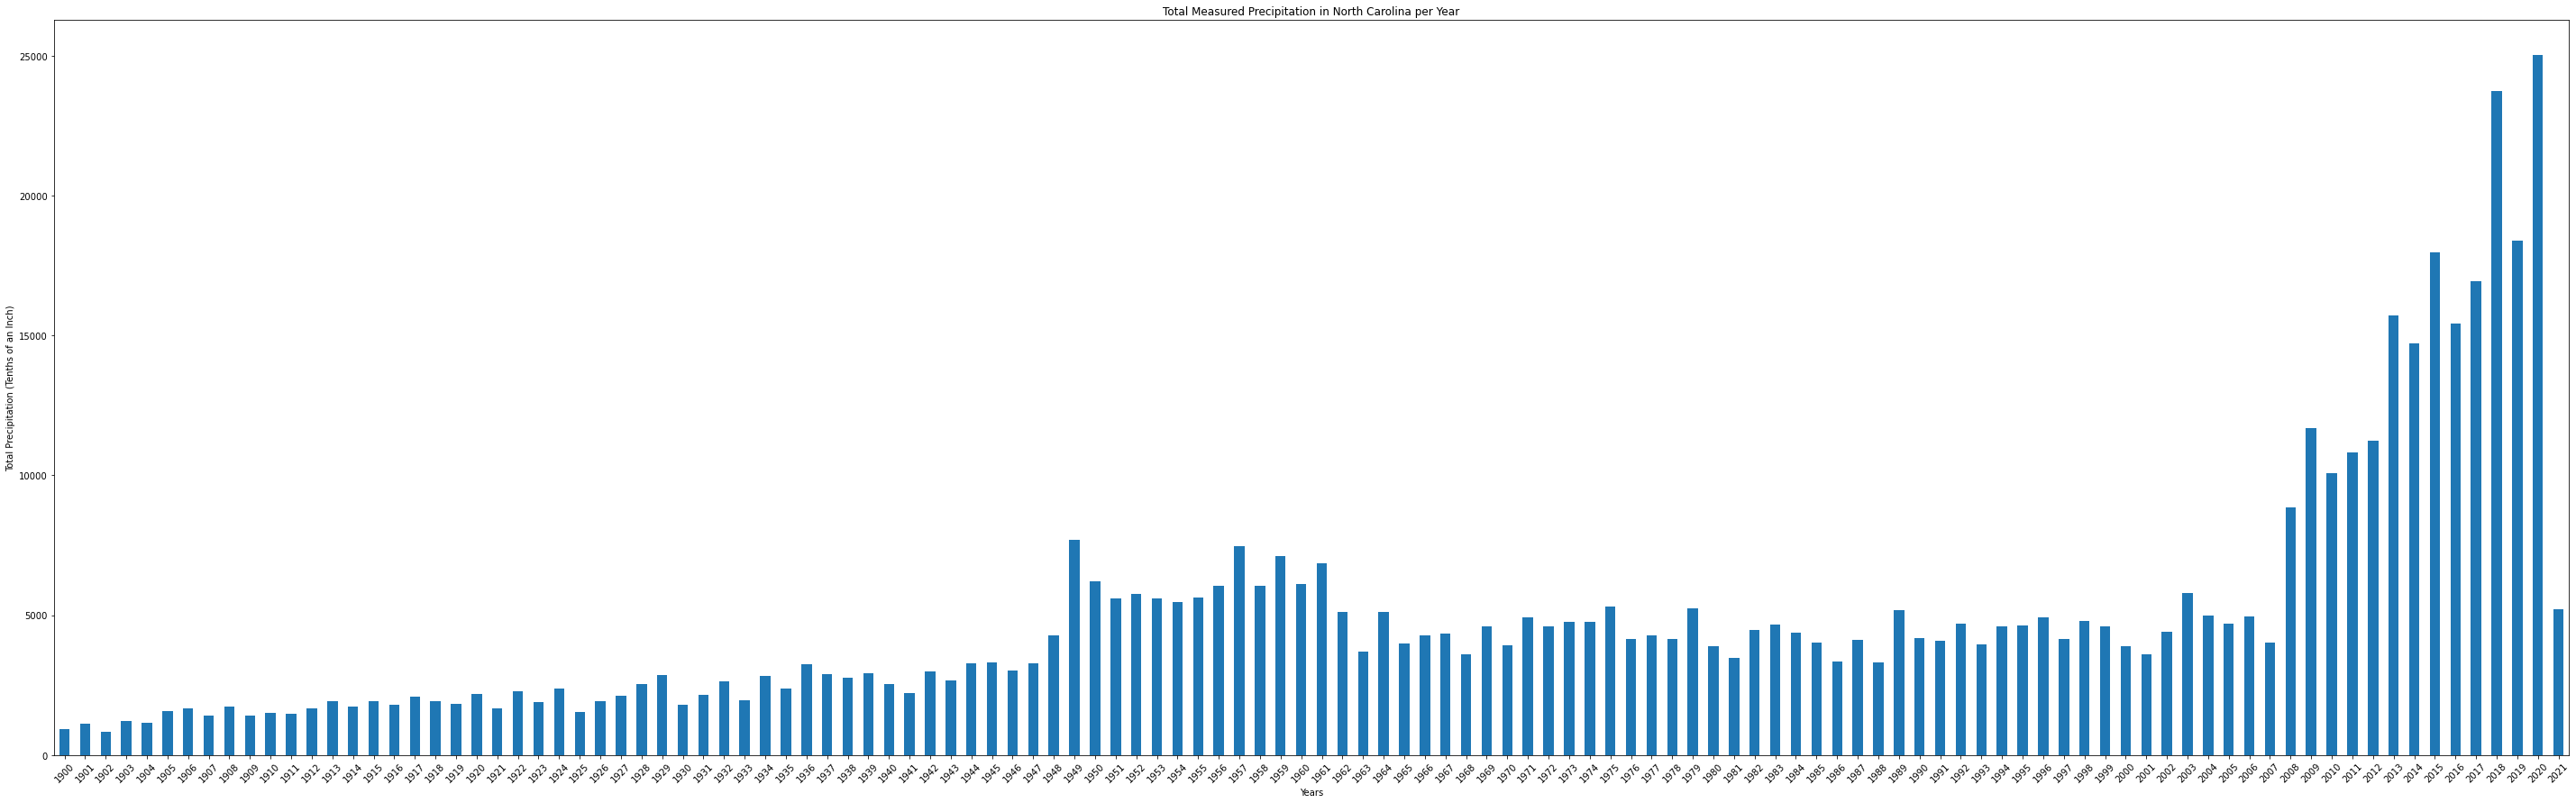

In [94]:
# Plot bar graph

bar_prec = total_annual_prec_df.plot(kind="bar", figsize = (50,15), legend=False)

plt.title("Total Measured Precipitation in North Carolina per Year")

bar_prec.set_xticklabels(total_annual_prec_df["YEAR"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.show()

In [10]:
# matplotlib available styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


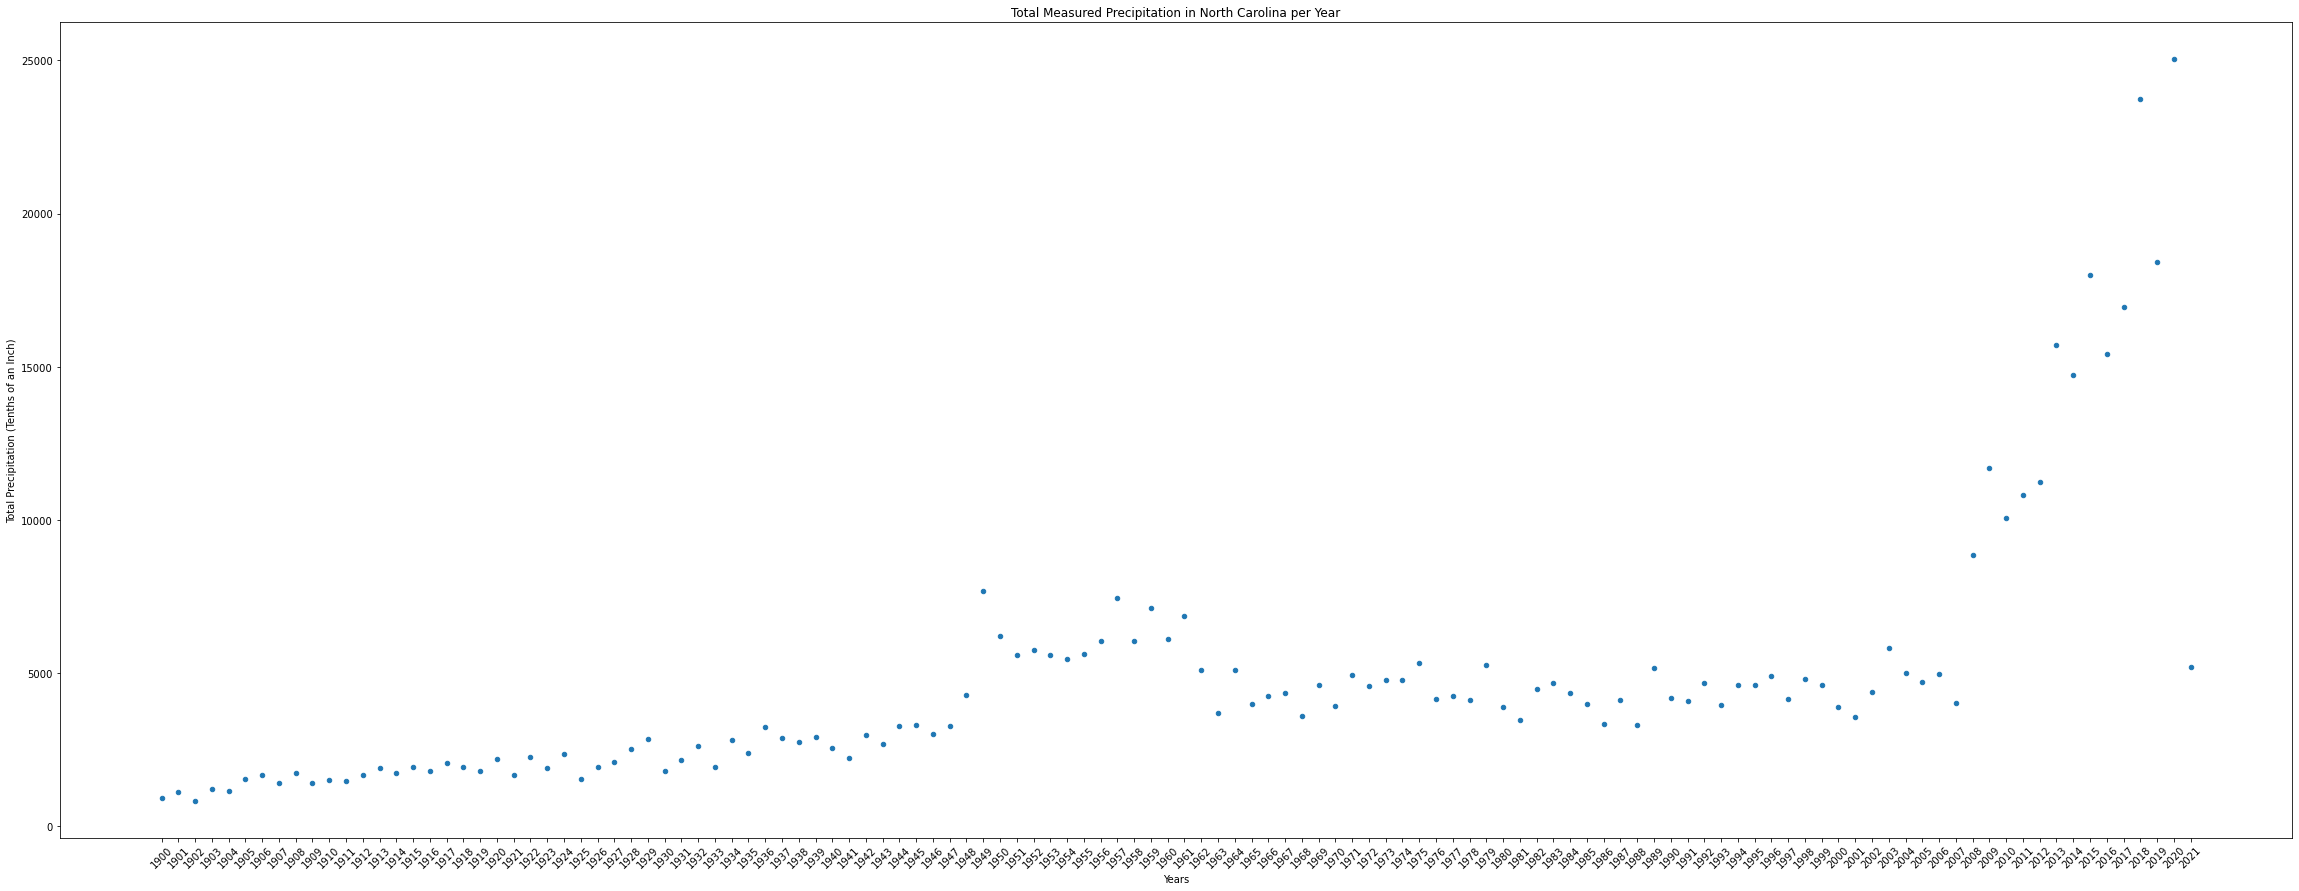

In [93]:
# Plot scatter plot

scatter_prec = total_annual_prec_df.plot(kind="scatter", x="YEAR", y="PRCP", figsize = (40,15))

plt.title("Total Measured Precipitation in North Carolina per Year")

scatter_prec.set_xticklabels(total_annual_prec_df["YEAR"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.show()